In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)
print(sns.__version__)

1.26.4
2.2.2
3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
1.5.1
0.13.2


In [231]:
df = pd.read_csv('housing.data', sep='\\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296.0000,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242.0000,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242.0000,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222.0000,18.7000,394.6300,2.9400,33.4000
4,0.0691,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222.0000,18.7000,396.9000,5.3300,36.2000


# Codes Description:

| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

In [232]:
#column names
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296.0000,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242.0000,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242.0000,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222.0000,18.7000,394.6300,2.9400,33.4000
4,0.0691,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222.0000,18.7000,396.9000,5.3300,36.2000


# Exploratory Data Anaysis (EDA)


Helps understand data patterns, detect anomalies, and select relevant features.

In [233]:
# Summary of the numerical columns in a dataset, including key statistics.

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,356.6740,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,91.2949,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,0.3200,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,375.3775,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,391.4400,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,396.9000,37.9700,50.0000


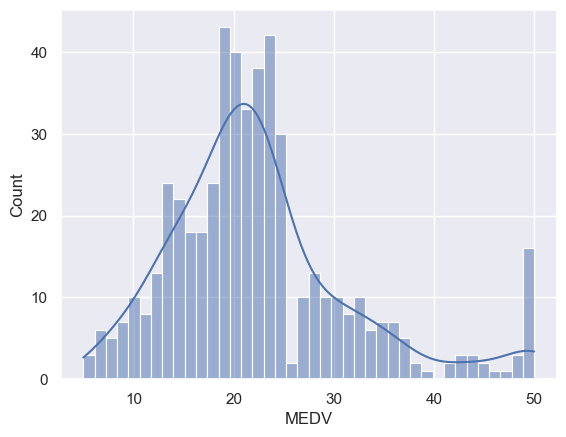

In [234]:
# Distribution of house prices
# Target variable MEDV = Median value of owner-occupied homes in $1000's
sns.histplot(df['MEDV'], bins=40, kde=True)  
plt.show()

# Correlation Matrix

Useful diagnostic tool to identify collinearity between predictors

In [235]:
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


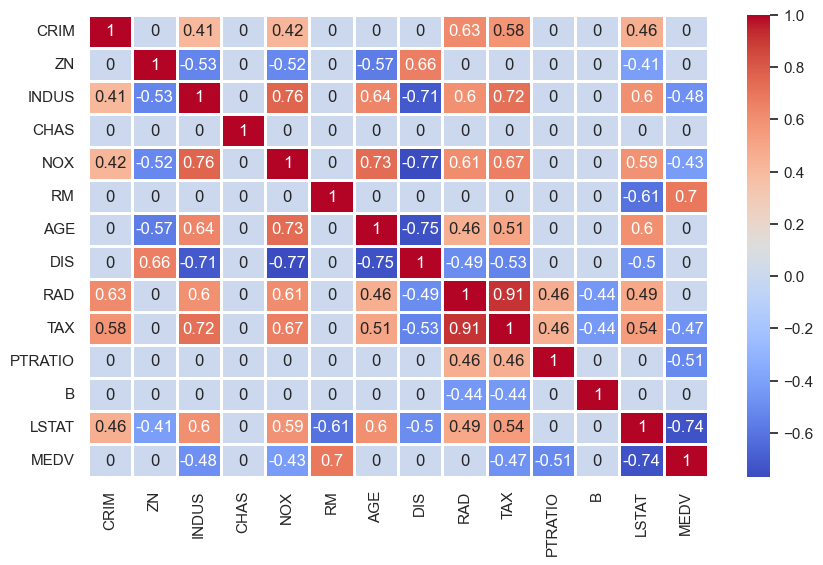

In [236]:
# setting low-correlation value ot zero for visibility
corr_matrix[np.abs(corr_matrix) < 0.4] = 0
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=2)
plt.show()

##### Relevant features include:

Strong correlation: RM,LSTAT  
Moderate correlation: INDUS, TAX, PTRATIO

## Detecting Collinearity with Eigenvectors

In [237]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())

In [238]:
pd.options.display.float_format = '{:,.4f}'.format
pd.Series(eigenvalues).sort_values()

8    0.0603
9    0.1340
12   0.1830
13   0.2128
11   0.2523
10   0.2773
7    0.4031
6    0.5354
5    0.6600
4    0.8509
3    0.8865
2    1.3489
1    1.6495
0    6.5460
dtype: float64

Note that index 8, eigenvalue of 0.0635, is near to zero or very small compared to the others. Small value represents presence of collinearity. 

In [239]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9    0.6988
8    0.6350
2    0.2355
13   0.1341
1    0.0963
4    0.0876
12   0.0831
0    0.0591
10   0.0557
7    0.0471
6    0.0382
3    0.0235
11   0.0162
5    0.0072
dtype: float64

Note that index 9, 8, 2 have very high loading when compared against the rest

In [240]:
print(df.columns[2], df.columns[8], df.columns[9])

INDUS RAD TAX


#### Removing INDUS to help reduce multicollinearity

# Linear Regression with Scikit-Learn

In [241]:
# Feature variables
X = df[['RM', 'LSTAT', 'TAX', 'PTRATIO']]

# Target variable
y = df['MEDV']

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [245]:
regression_model = LinearRegression()

# Train model
regression_model.fit(X_train, y_train)

LinearRegression()

In [246]:
# Make prediction using test
y_pred = regression_model.predict(X_test)

In [247]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 27.3056939668794
Root Mean Squared Error (RMSE): 5.225485046087052
R² Score: 0.6276519117091852


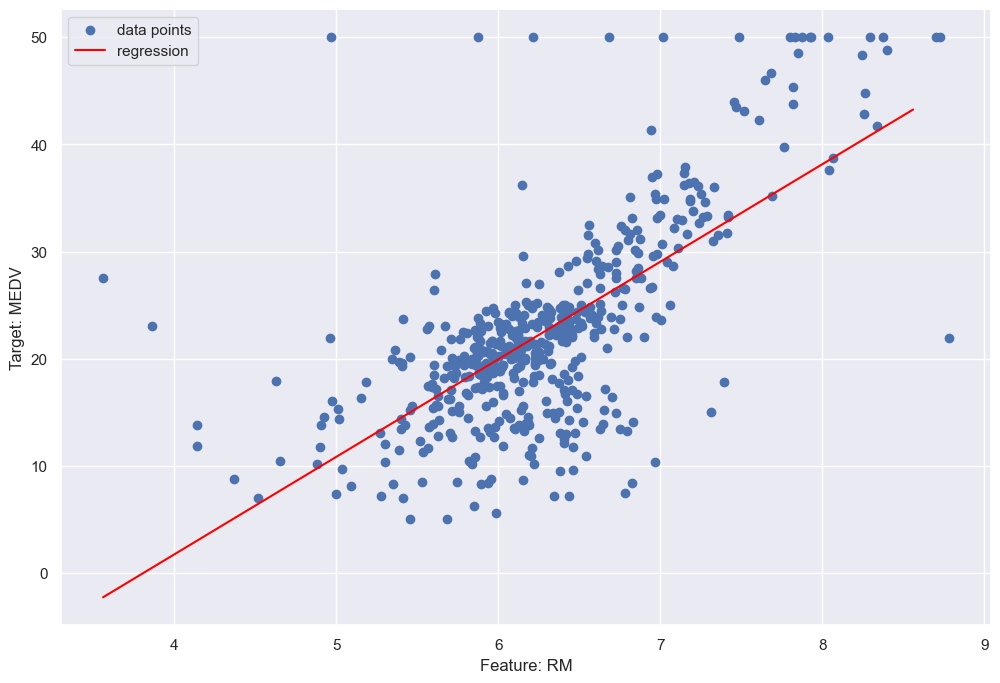

In [248]:
X = df['RM'].values.reshape(-1, 1)  # Reshape to make it 2D
X_fit = np.arange(X.min(), X.max(), 1).reshape(-1, 1)

# Fit scaler only on 'RM' data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply scaler to new X_fit data
X_fit_scaled = scaler.transform(X_fit)

# Train the model and make predictions
regression_model.fit(X_scaled, y)  # Fit on the scaled data
y_fit_pred = regression_model.predict(X_fit_scaled)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X, y, label='data points')
ax.plot(X_fit, y_fit_pred, color='red', label='regression')
ax.set_xlabel('Feature: RM')
ax.set_ylabel('Target: MEDV')

plt.legend()
plt.show()

# Tentative Optimization

### Quadratic

In [316]:
from sklearn.preprocessing import PolynomialFeatures

In [317]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

In [318]:
regression_model.fit(X_poly, y)

LinearRegression()

In [319]:
y_pred_poly = regression_model.predict(X_poly)

In [320]:
# Model Evaluation
mse = mean_squared_error(y, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_poly)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 38.1217072624397
Root Mean Squared Error (RMSE): 6.174277873763028
R² Score: 0.5484256373971057


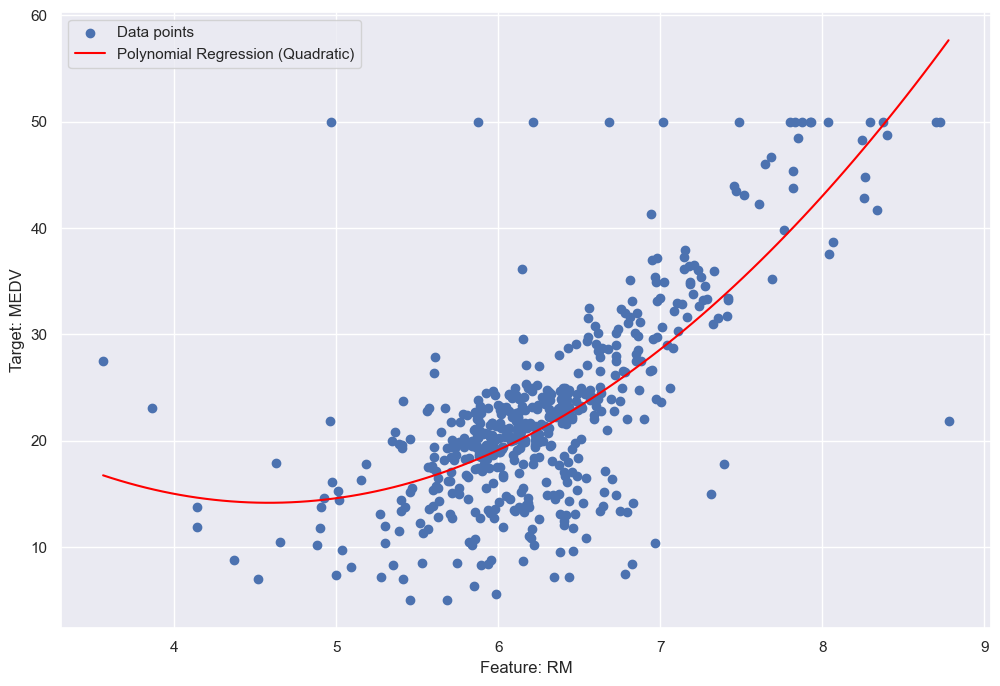

In [321]:
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_fit_scaled = scaler.transform(X_fit)
X_fit_poly = poly.transform(X_fit_scaled)
y_fit_pred = regression_model.predict(X_fit_poly)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X, y, label='Data points')
ax.plot(X_fit, y_fit_pred, color='red', label='Polynomial Regression (Quadratic)')

# Adding x and y axis labels
ax.set_xlabel('Feature: RM')
ax.set_ylabel('Target: MEDV')

plt.legend()
plt.show()

#### Is not better than linear regression

## RANdom SAmple Consensus (RANSAC) Algorithm

In [322]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [323]:
from sklearn.linear_model import RANSACRegressor

In [324]:
ransac = RANSACRegressor()

In [325]:
ransac.fit(X, y)

RANSACRegressor()

In [326]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [327]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))
y_pred_ransac = ransac.predict(X)

In [328]:
# Model Evaluation
mse = mean_squared_error(y, y_pred_ransac)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_ransac)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 45.715473088506386
Root Mean Squared Error (RMSE): 6.76132184476574
R² Score: 0.4584729514102335


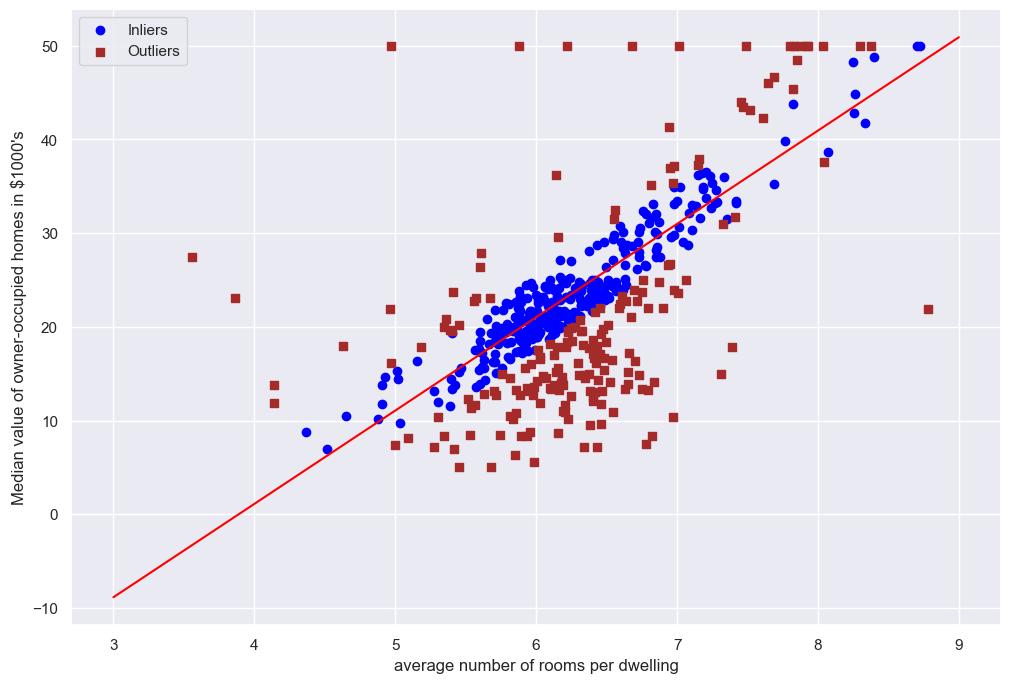

In [329]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

#### Also isn't better than linear regression